# Import Library and Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
df = pd.read_csv('dataset/bank.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.shape

(4521, 17)

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Data cleaning

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
print('Total Missing Values : ', df.isnull().sum().sum())

Total Missing Values :  0


In [10]:
print('Total Duplicated Values: ', df.duplicated().sum())

Total Duplicated Values:  0


# Data Exploration

**Categorical Columns**
1. job
2. marital
3. education
4. default
5. housing
6. loan
7. contact
8. month
9. day_of_week
10. poutcome
11. y


**Numerical Column**
1. Age
2. duration
3. campaign
4. pdays
5. previous
6. emp.var.rate
7. cons.price.idx
8. cons.conf.idx
9. euribor3m
10. nr.employed

## Analizing Categorical Columns

In [11]:
find_categorical = df.select_dtypes(include=['object','category']).columns.tolist()
categorical_col = df[find_categorical]

In [12]:
for col in categorical_col:
    print(f'{col} : {categorical_col[col].unique()}')
    print()

job : ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

marital : ['married' 'single' 'divorced']

education : ['primary' 'secondary' 'tertiary' 'unknown']

default : ['no' 'yes']

housing : ['no' 'yes']

loan : ['no' 'yes']

contact : ['cellular' 'unknown' 'telephone']

month : ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

poutcome : ['unknown' 'failure' 'other' 'success']

y : ['no' 'yes']



In [13]:
categorical_col.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


In [14]:
df.groupby('y').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
no,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
yes,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521


## Analizing numerical columns

In [15]:
find_num = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_col = df[find_num]
num_col.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [16]:
num_col.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


## Visualize feature correlations

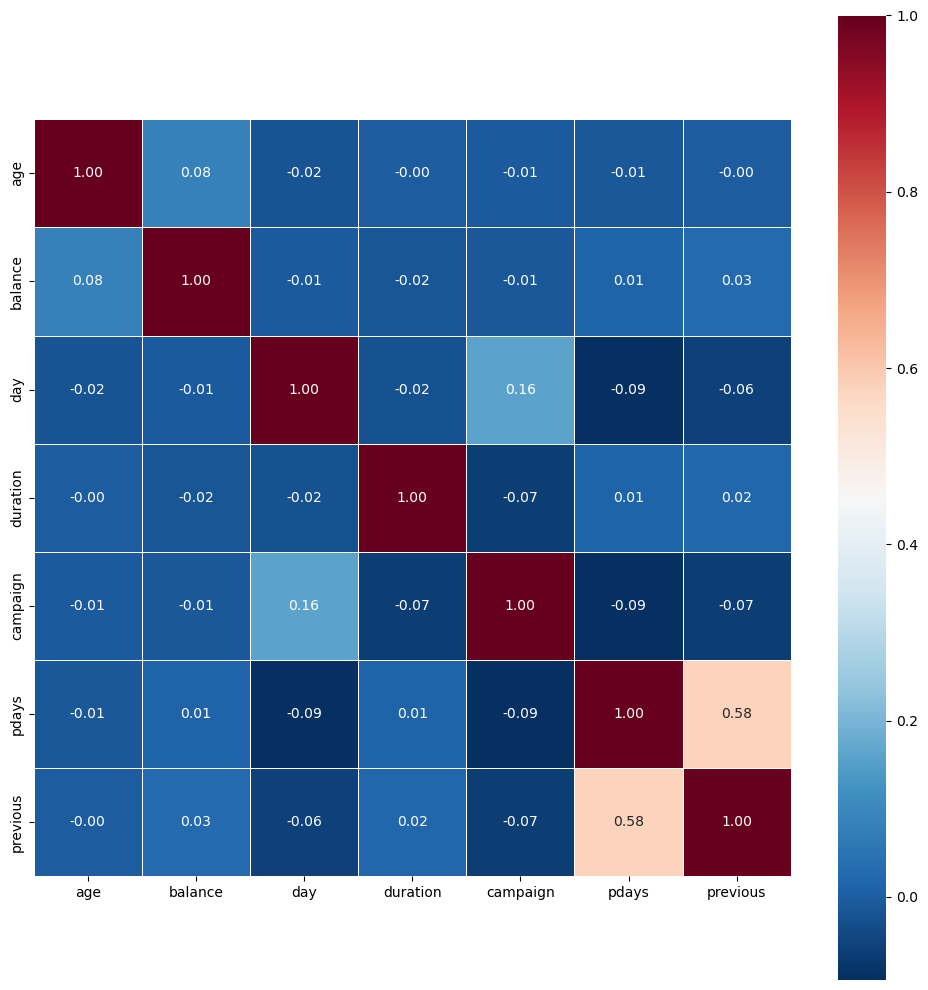

In [17]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(num_col.corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

In [18]:
print('Value in Categorical Columns\n')
for col in categorical_col:
    print(df[col].value_counts(), "\n")

Value in Categorical Columns

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64 

married     2797
single      1196
divorced     528
Name: marital, dtype: int64 

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64 

no     4445
yes      76
Name: default, dtype: int64 

yes    2559
no     1962
Name: housing, dtype: int64 

no     3830
yes     691
Name: loan, dtype: int64 

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64 

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64 

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

## Find Distribution for Job

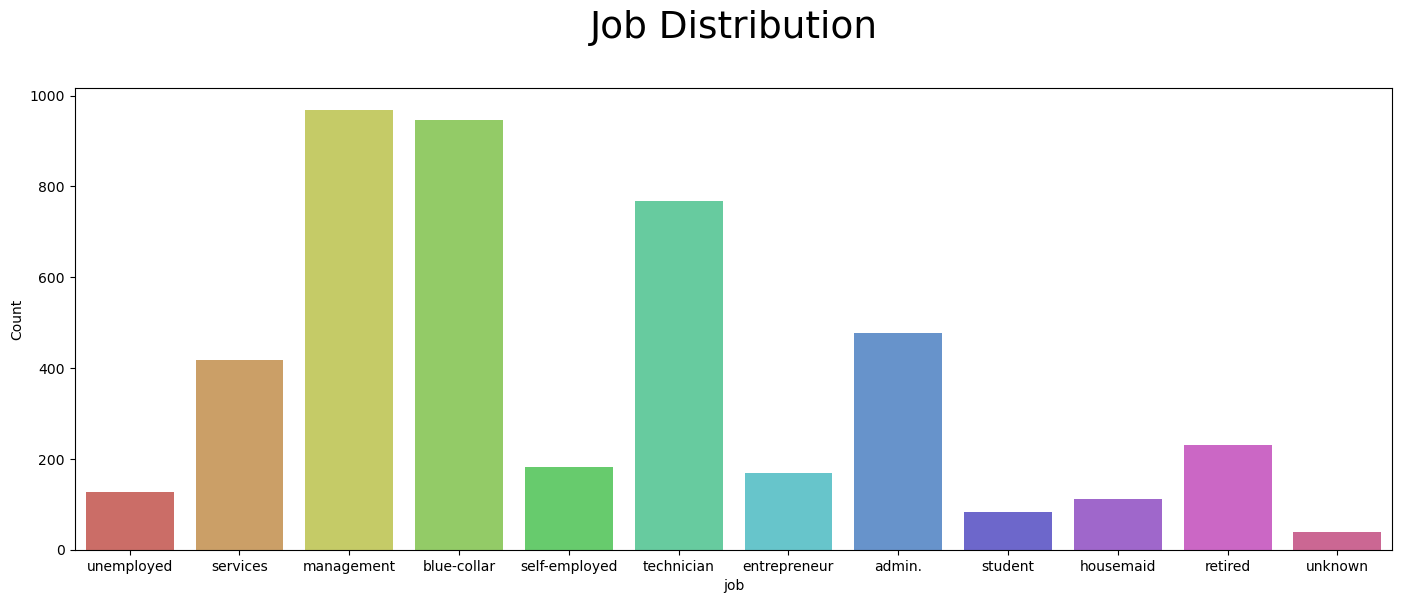

In [19]:
fig, ax = plt.subplots(figsize=(17,6))
sns.countplot(x='job', data=df, palette='hls')
plt.xlabel('job')
plt.ylabel('Count')
plt.title('Job Distribution\n', fontsize=27)
plt.show()

The Majority Jobs are in the field Management, Blue-collar, and technician

## Distribution for education level

Text(0, 0.5, 'Education Level')

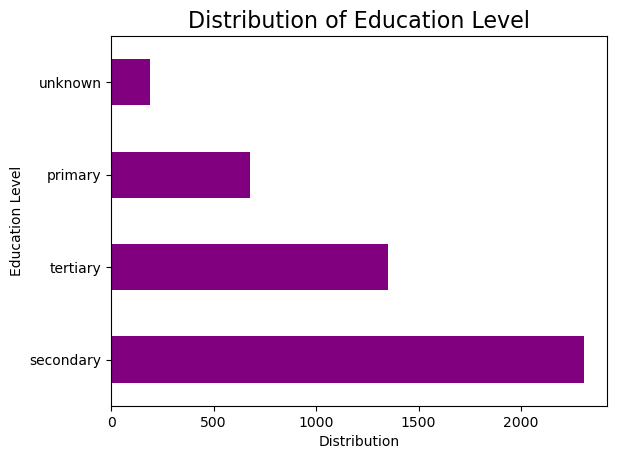

In [20]:
df.groupby('education').size().sort_values(ascending=False).plot(kind='barh',color='purple')
plt.title('Distribution of Education Level', fontsize=16)
plt.xlabel('Distribution')
plt.ylabel('Education Level')

The majority of education level is secondary education level

## Distribution of Subscribed and Non-Subscribed  Term Deposit

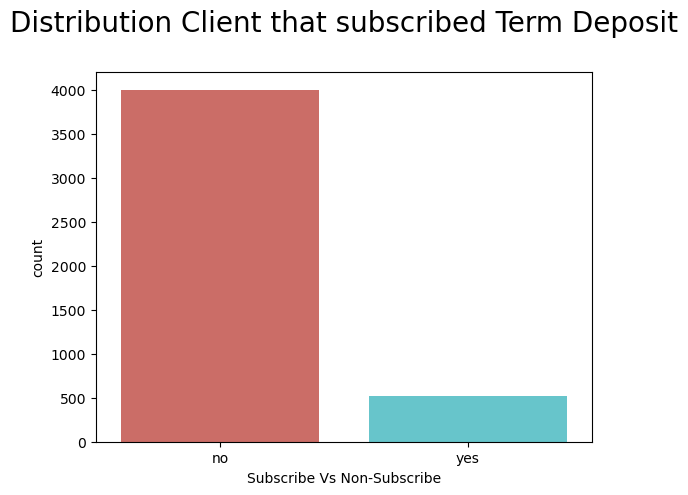

In [21]:
sns.countplot(x='y', data=df, palette='hls')
plt.title('Distribution Client that subscribed Term Deposit\n', fontsize=20)
plt.xlabel('Subscribe Vs Non-Subscribe')
plt.show()

## Distribution of Marital Status

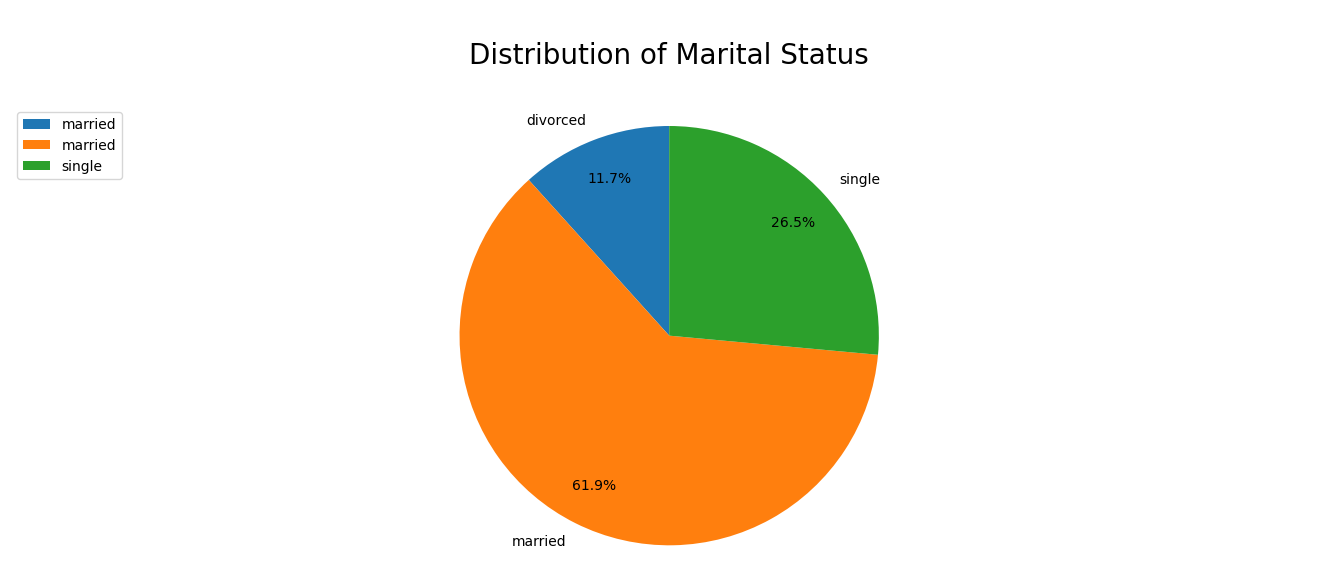

In [22]:
df.groupby('marital').size().plot(kind='pie',
                                           figsize=(17,6),
                                           autopct = '%1.1f%%',
                                           startangle=90,
                                           shadow=False,
                                           pctdistance=0.8)
plt.title('\nDistribution of Marital Status\n', fontsize=20)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=df['marital'], loc='upper left')
plt.show()

## Distribution of Loan based on Job

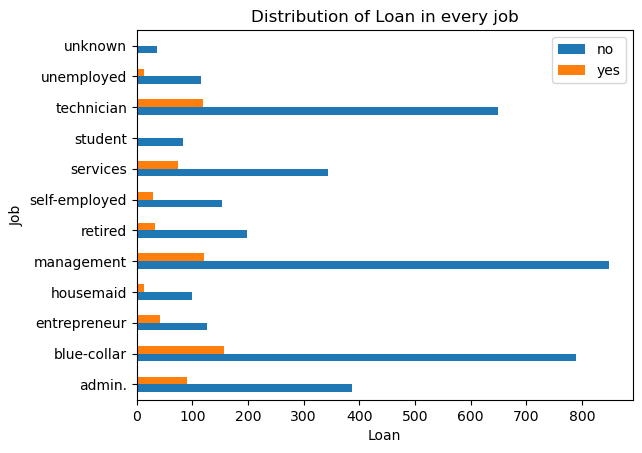

In [23]:
pd.crosstab(df.job, df.loan).plot(kind='barh')
plt.title('Distribution of Loan in every job')
plt.xlabel('Loan')
plt.ylabel('Job')
plt.legend(labels=df['loan'].unique() , loc='upper right')

## Find Relation for Every Features

<Figure size 640x480 with 0 Axes>

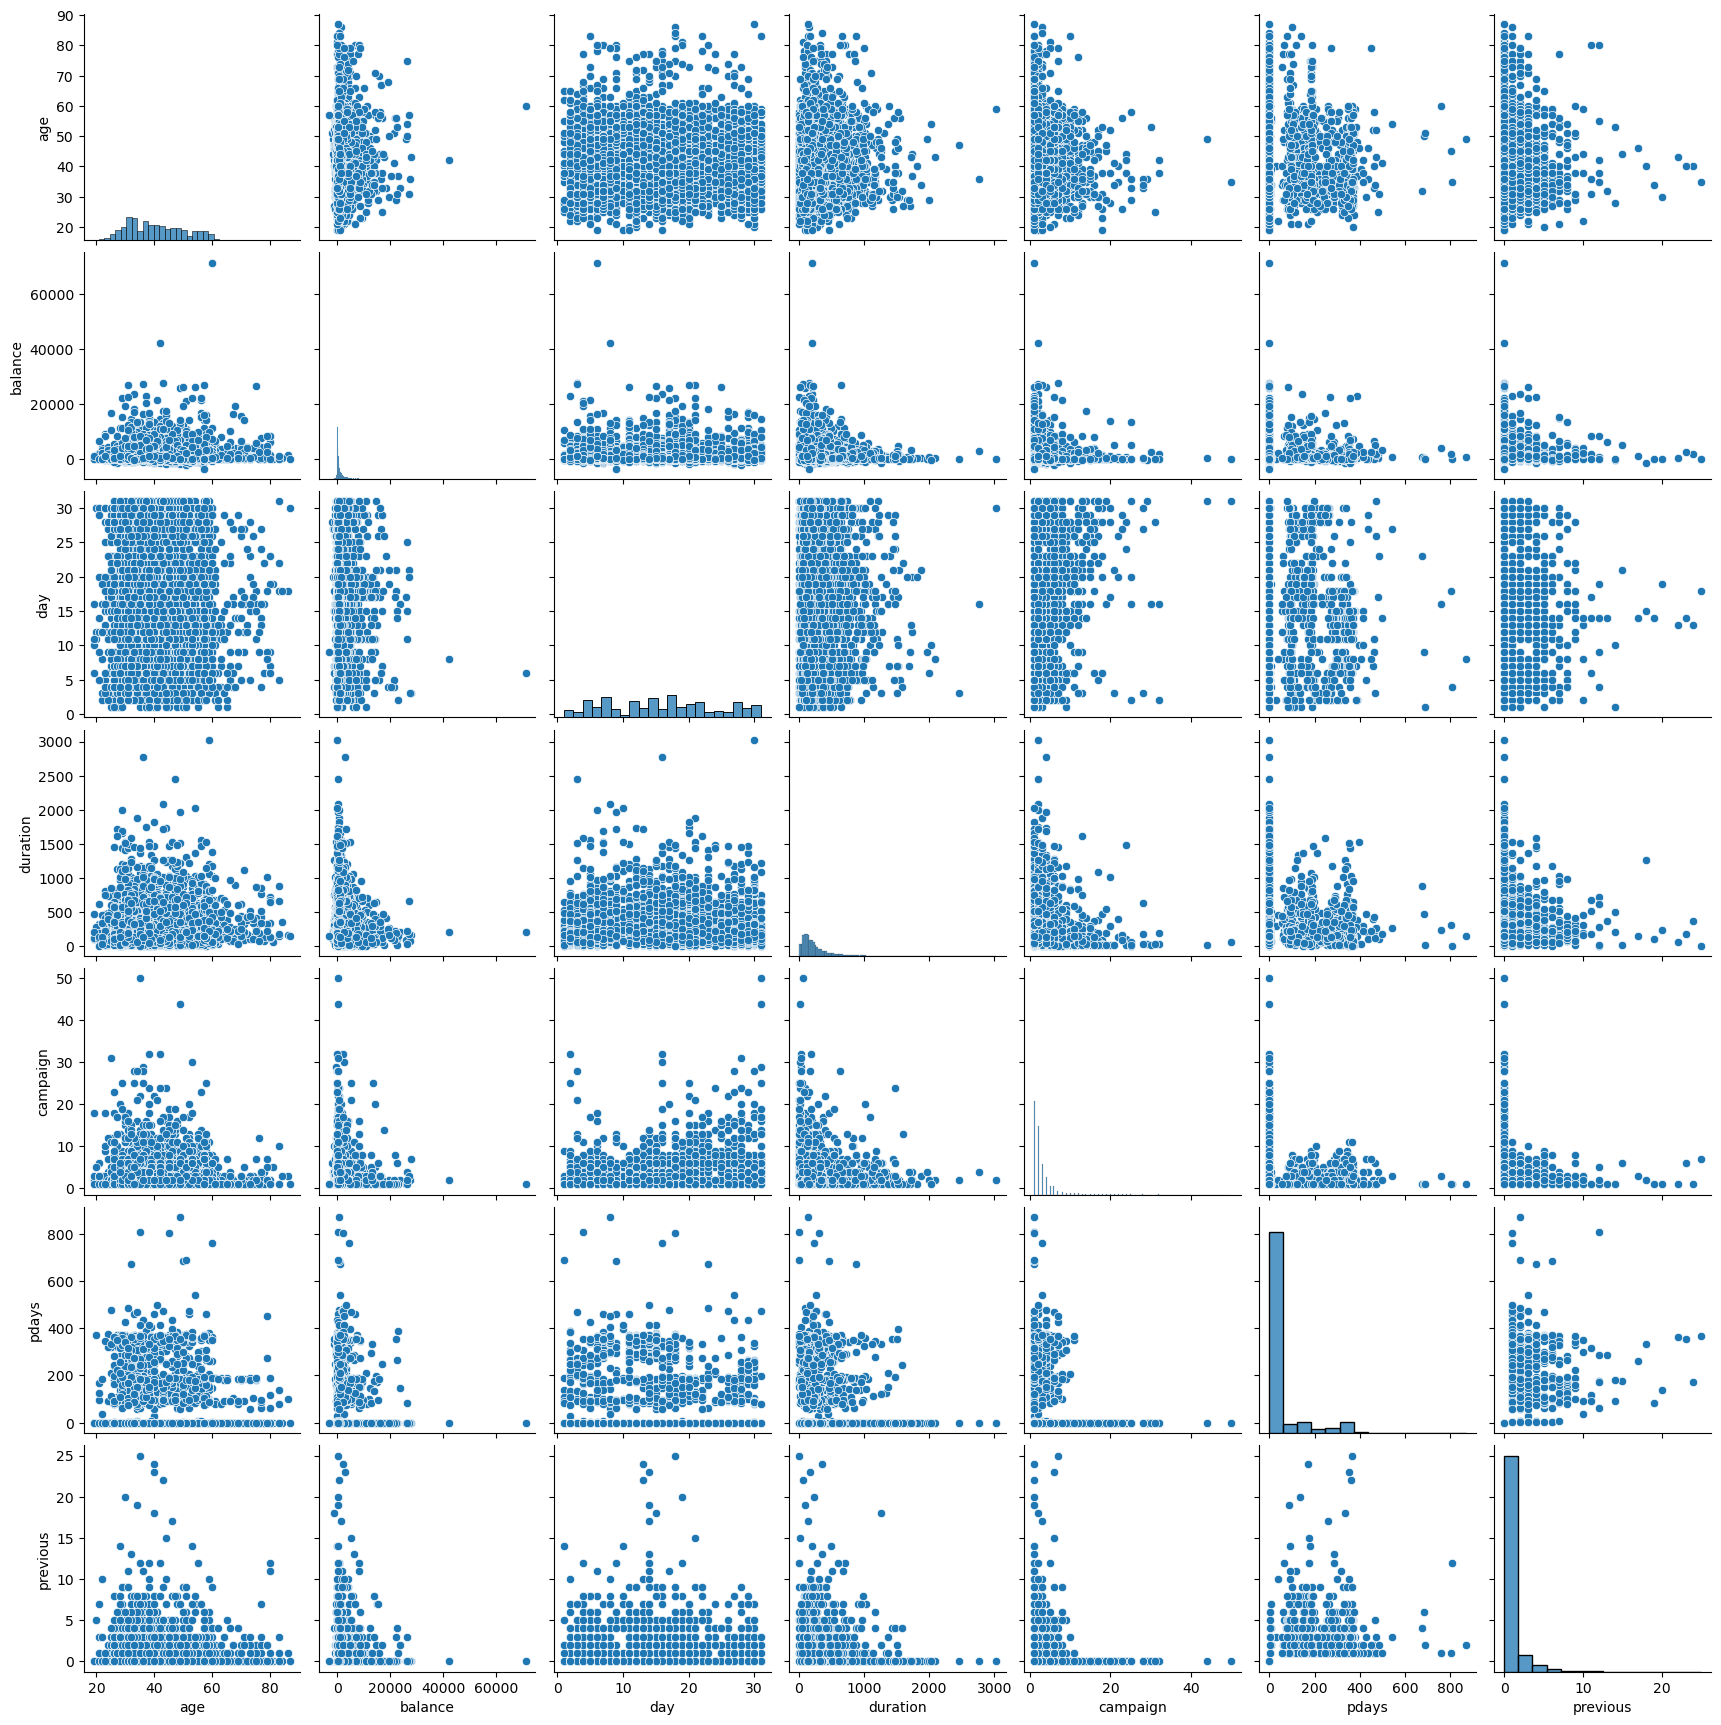

In [24]:
plt.figure()
sns.pairplot(df) 
plt.show()

# Classification

In [25]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
#replace 'y' value 
df['y'].replace({'yes':1, 'no':0}, inplace=True)

In [27]:
df['y'].unique()

array([0, 1], dtype=int64)

In [28]:
corr = df.corr()
print(corr['y'].sort_values(axis=0,ascending=True))

campaign   -0.061147
day        -0.011244
balance     0.017905
age         0.045092
pdays       0.104087
previous    0.116714
duration    0.401118
y           1.000000
Name: y, dtype: float64


In [29]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


# Feature 

In [30]:
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [31]:
df= pd.get_dummies(df,columns = ['job','marital','education','default','housing',
                                'loan','contact','month','campaign', 'poutcome'], drop_first=True)

In [32]:
df.head()

,age,balance,day,duration,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_44,campaign_50,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,33,4789,11,220,339,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,1350,16,185,330,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,59,0,5,226,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df.shape

(4521, 73)

# Train Test

In [34]:
#drop categorical column and assign to X
X = df.drop(['y'], axis=1)

In [35]:
#assign ['y'] as Label in variable y
y = df['y']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Logistic Regression

In [37]:
print('Length of x_train : ', len(X_train))
print('Length of y_train: ', len(y_train))
print('Length of X_test : ', len(X_test))
print('Length of y_test : ', len(y_test))

Length of x_train :  3164
Length of y_train:  3164
Length of X_test :  1357
Length of y_test :  1357


In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)

In [40]:
y_pred = logreg.predict(X_test)

In [41]:
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (3164, 72)
Shape of y_train : (3164,)
Shape of X_test : (1357, 72)
Shape of y_test : (1357,)


In [42]:
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))
print('Accuracy : ', metrics.accuracy_score(y_test,y_pred))

Evaluasi Model Performance:
Training Accuracy : 0.9102402022756005
Testing Accuracy : 0.8872512896094326
Accuracy :  0.8872512896094326


### Confusion Matrix 

In [43]:
print("\nPrint Confusion matrix dan classification report\n")

#apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Print Confusion matrix dan classification report

Confusion matrix:
[[1154   36]
 [ 117   50]]


In [44]:
#apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test,y_pred)
print(cr)

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.58      0.30      0.40       167

    accuracy                           0.89      1357
   macro avg       0.74      0.63      0.67      1357
weighted avg       0.87      0.89      0.87      1357



## K-Nearest Neighbors (KNN)

In [45]:
#create KNN Classifier 
knn = KNeighborsClassifier(n_neighbors=2)

#train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [46]:
#predict the response
y_pred2 = knn.predict(X_test)

In [47]:
#Accuracy
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred2))

Accuracy :  0.8798820928518791


In [48]:
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred2)
print(cm)

Confusion matrix:
[[1172   18]
 [ 145   22]]


In [49]:
print("Classification report:")
cr = classification_report(y_test,y_pred2)
print(cr)

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1190
           1       0.55      0.13      0.21       167

    accuracy                           0.88      1357
   macro avg       0.72      0.56      0.57      1357
weighted avg       0.85      0.88      0.85      1357



## Decision Tree

In [50]:
clf = DecisionTreeClassifier()

In [51]:
clf = clf.fit(X_train, y_train)

In [52]:
y_pred3 = clf.predict(X_test)

In [53]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred3))

Accuracy :  0.8673544583640383


In [54]:
print(metrics.confusion_matrix(y_test, y_pred3))
print(metrics.classification_report(y_test, y_pred3))

[[1112   78]
 [ 102   65]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1190
           1       0.45      0.39      0.42       167

    accuracy                           0.87      1357
   macro avg       0.69      0.66      0.67      1357
weighted avg       0.86      0.87      0.86      1357



## SVM

In [55]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred4 = clf.predict(X_test)

In [56]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred4))

Accuracy :  0.8857774502579219


In [57]:
print("Precision: ", metrics.precision_score(y_test, y_pred4))

Precision:  0.6363636363636364


In [58]:
print("Recall: ", metrics.recall_score(y_test, y_pred4))

Recall:  0.16766467065868262


This dataset is imbalance

## Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [61]:
y_pred5=nb.predict(X_test)

In [62]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred5))

Accuracy :  0.1503316138540899


In [63]:
print(metrics.confusion_matrix(y_test, y_pred5))

[[  41 1149]
 [   4  163]]


## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_pred6 = rf.predict(X_test)

In [67]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred6))

Accuracy :  0.8865143699336773


In [68]:
print(metrics.confusion_matrix(y_test, y_pred6))

[[1170   20]
 [ 134   33]]


# Handling Imbalanced Dataset

In [69]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 354
Before OverSampling, counts of label '0': 2810 



In [70]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
sm = SMOTE()
X_train = X_train.astype(float)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [73]:
print('After Oversampling, The shape of X_train: ', format(X_train_sm.shape))
print('After Oversampling, The shape of y_train: ', format(y_train_sm.shape))

After Oversampling, The shape of X_train:  (5620, 72)
After Oversampling, The shape of y_train:  (5620,)


In [74]:
from collections import Counter
print("Before oversampling: ",Counter(y_train))
print("After oversampling: ",Counter(y_train_sm))

Before oversampling:  Counter({0: 2810, 1: 354})
After oversampling:  Counter({0: 2810, 1: 2810})


## Logistic Regression After Handling imbalanced dataset

In [75]:
logreg2 = LogisticRegression()
logreg2.fit(X_train_sm, y_train_sm)
ypred_sm = logreg2.predict(X_test)

In [76]:
print('Accuracy : ', metrics.accuracy_score(y_test,ypred_sm))

Accuracy :  0.8555637435519529


In [77]:
print(metrics.confusion_matrix(y_test, ypred_sm))

[[1034  156]
 [  40  127]]


In [78]:
print(metrics.classification_report(y_test, ypred_sm))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1190
           1       0.45      0.76      0.56       167

    accuracy                           0.86      1357
   macro avg       0.71      0.81      0.74      1357
weighted avg       0.90      0.86      0.87      1357



## SVM After handling imbalanced dataset

In [79]:
clf2 = svm.SVC()
clf2.fit(X_train_sm, y_train_sm)
ypred_sm = clf2.predict(X_test)

In [80]:
print('Accuracy : ', metrics.accuracy_score(y_test,ypred_sm))

Accuracy :  0.864406779661017


In [81]:
print("Precision: ", metrics.precision_score(y_test, ypred_sm))
print("Recall: ", metrics.recall_score(y_test, ypred_sm))

Precision:  0.46255506607929514
Recall:  0.6287425149700598


In [82]:
print(metrics.classification_report(y_test, ypred_sm))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1190
           1       0.46      0.63      0.53       167

    accuracy                           0.86      1357
   macro avg       0.70      0.76      0.73      1357
weighted avg       0.89      0.86      0.87      1357



In [83]:
print(metrics.confusion_matrix(y_test, ypred_sm))

[[1068  122]
 [  62  105]]


Setelah melakukan handling imbalanced dataset menggunakan SMOTE(), **SVM** Memberikan hasil yang terbaik